Author: Thibeau Wouters

# Master thesis: example of a dynamical system


##### Import packages:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import scipy as scipy

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

##### Define functions

In [3]:
def solve_ODE_2D(f, g, t_vals, initial_cond, rabbit_vs_sheep = False):
    '''Solves a 2D system of differential equations.'''
    x0 = initial_cond[0]; y0 = initial_cond[1]
    
    x_vals = []
    y_vals = []
    
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]: # append the initial condition
            x_vals.append(x0)
            y_vals.append(y0)
            
        else:
            x_val = x_vals[-1] + DeltaT*f(x_vals[-1],  y_vals[-1])
            y_val = y_vals[-1] + DeltaT*g(x_vals[-1], y_vals[-1])
            
            x_vals.append(x_val); y_vals.append(y_val)
            
            # For the rabbit vs sheep problem: stop if one of the species goes extinct, not physically relevant
            if rabbit_vs_sheep:
                if x_val <= 0.0001 or y_val <= 0.0001: 
                    print('Extinction')
                    return (x_vals, y_vals)
    
    return (x_vals, y_vals)

In [4]:
def magnitude(vector):
    '''Gives the magnitude of a 2D vector.'''
    return np.sqrt(vector[0]**2 + vector[1]**2) 

In [5]:
def plot_eigendirections(x0, y0, vectors, types,  length = 1, c = 0.85, head_width = 0.006, width = 0.01, markersize = 60):
    '''Plots the eigendirections of a fixed point, type = positive or negative.
        c: factor which shortens the two arrows 
        length: of the two arrows'''

    # Normalise the two vectors with the desired length
    
    vectors_N = []
    
    for vector in vectors:
        normalised_vector =  length*vector/magnitude(vector)
        vectors_N.append(normalised_vector)
    
    # Define other scale factor in function of c
    a = 1-c
    
    # Plot the arrows
    
    for i in range(len(vectors_N)):
        vector_N = vectors_N[i]
        
        # For a repulsion
        if types[i] == 'rep':
            plt.arrow(x0 + a*vector_N[0], y0 + a*vector_N[1],   vector_N[0],    vector_N[1], color = 'black', zorder = 10, width = width, head_width = head_width)
            plt.arrow(x0  - a*vector_N[0], y0  - a*vector_N[1], - vector_N[0], - vector_N[1], color = 'black', zorder = 10, width = width,  head_width = head_width)
        
        # For an attraction
        if types[i] == 'attr':
            plt.arrow(x0 + vector_N[0], y0 + vector_N[1], - c*vector_N[0], - c*vector_N[1], color = 'black', zorder = 10, width = width, head_width = head_width)
            plt.arrow(x0  - vector_N[0], y0  - vector_N[1],    c*vector_N[0],    c*vector_N[1], color = 'black', zorder = 10, width = width, head_width = head_width)

    plt.scatter(x0, y0, color = 'black', s = markersize, zorder = 10)

## Classification of linear systems

### 2.1.1 First system:

In [6]:
# Save eigendirections found in report:

v1 = np.array([-0.5, 1])
v2 = np.array([-1, 1])

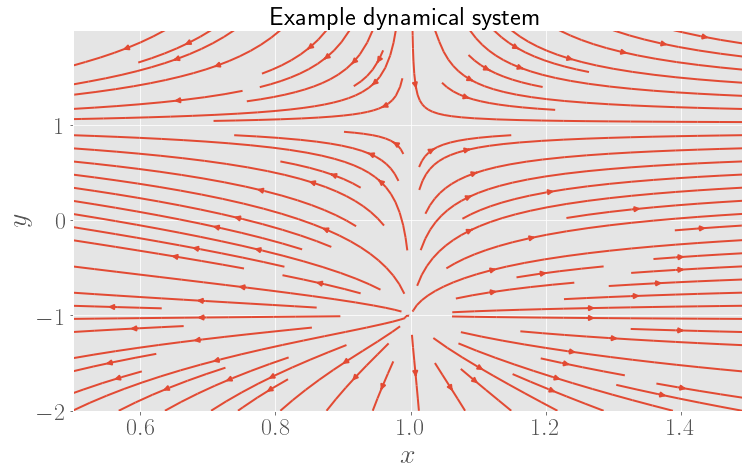

In [7]:
plt.figure(figsize = (12, 7))

# Width (for x and y) of the phase portrait grid
left = 0.5; right = 1.5; down = -2; up = 2

# Set up streamplot
X, Y = np.meshgrid(np.arange(left, right, 0.01), np.arange(down, up, 0.01))
U = -1 + X**3
V = 1 - Y**2

# Plot 
plt.streamplot(X, Y, U, V, density = 1, linewidth = 2)

# Plot fixed points
# plt.scatter(0, 0, color = 'black', zorder = 10)

# Plot eigendirections

# plot_eigendirections(0, 0, [v1, v2], ['attr', 'attr'], length = 1.4, c = 0.75, width = 0.02, head_width = 0.08, markersize = 70)

# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Example dynamical system')
# plt.savefig('ex_2_1_system1.pdf', bbox_inches = 'tight')

plt.show()

0.7125000000000004
1.4250000000000007
2.1375
2.8499999999999996
3.5625
4.275
4.9875
5.7
6.4125000000000005
7.125
7.8375
8.55
9.262500000000001
9.975


<ipython-input-8-2742f65bc826>:7: RuntimeWarning: overflow encountered in double_scalars
  return -1 + x**3
No handles with labels found to put in legend.


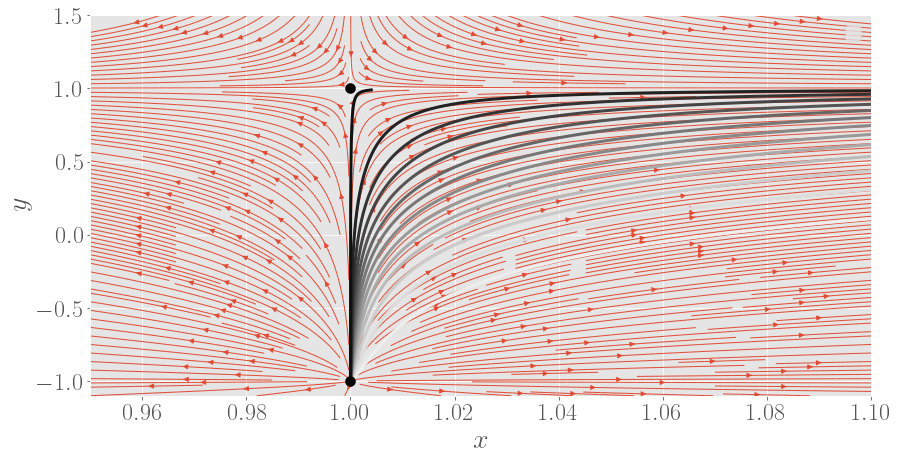

In [8]:
# Figure details
plt.figure(figsize = (14, 7))
# Width (for x and y) of the phase portrait grid
left = 0.95; right = 1.1; down = -1.1; up = 1.5

def xdot(x, y):
    return -1 + x**3

def ydot(x, y):
    return 1 - y**4

# Get values solutions and plot
t_vals = np.arange(0, 4, 0.001)

def get_initial_condition(alpha1, alpha2):
    t = np.log(10**(-2))
    return (1 + alpha1*np.exp(3*t), -1 + alpha2*np.exp(2*t))

cte = 10
alpha_values = np.linspace(10, 0.025, 15)
colors_list = []
for (i, alpha) in enumerate(alpha_values):
    if i != 0:
        alpha2 = cte - alpha
        print(alpha2)
        IC = get_initial_condition(1, alpha2)
        IC = get_initial_condition(alpha, alpha2)
        color = str(1 - i/len(alpha_values)) # 0 = black, 1 = white
        colors_list.append(color)
        x, y = solve_ODE_2D(xdot, ydot, t_vals, IC)
        plt.plot(x, y, color = color)

### new: streamplot
X, Y = np.meshgrid(np.arange(left, right, 0.001), np.arange(down, up, 0.001))
U = -1 + X**3
V = 1 - Y**2

# Plot streamlines
plt.streamplot(X, Y, U, V, density = 3, linewidth = 1)

# Plot critical points
plt.scatter(1,-1, color = 'black', zorder = 1000)
plt.scatter(1,1, color = 'black')

# Colorbar
# plt.colorbar("Binary")

# Make fancy, save and show
plt.legend(fontsize = 20)
plt.xlim(left, right)
plt.ylim(down, up)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# plt.title('Example of finetuned flows')
plt.savefig('example_of_fine_tuned_flows.pdf', bbox_inches = 'tight')
plt.savefig('example_of_fine_tuned_flows.png', bbox_inches = 'tight')
plt.show()

## 2.3 - Phase portrait in 2D

Define the right hand sides of the differential equations.

In [9]:
def xdot(x, y):
    return x- y 

def ydot(x, y):
    return 1-np.exp(x)

Plot the solutions with given initial conditions.

<ipython-input-9-ca9247a4c1e8>:5: RuntimeWarning: overflow encountered in exp
  return 1-np.exp(x)


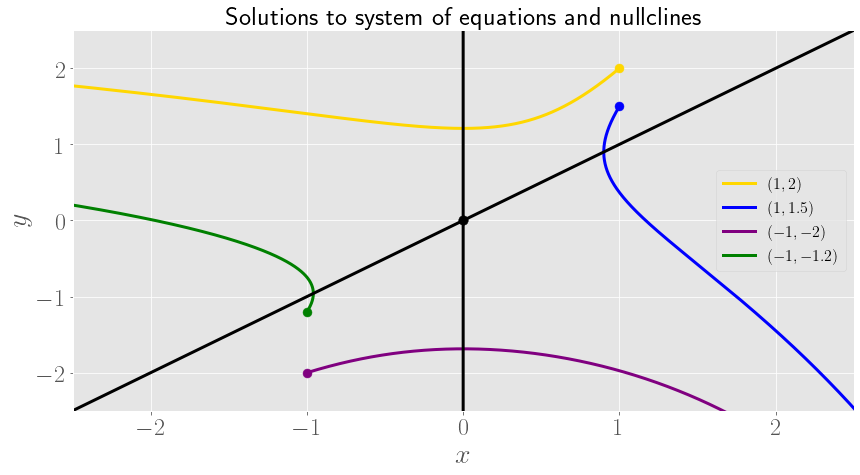

In [10]:
plt.figure(figsize = (14, 7))

w = 2.5 # width of the figure

# Define plot parameters for the four initial conditions
initial_conds = [(1, 2), (1, 1.5), (-1, -2), (-1, -1.2)]
labels = [r'$(1,2)$', r'$(1,1.5)$', r'$(-1,-2)$', r'$(-1,-1.2)$']
colors = ['gold', 'blue', 'purple', 'green']

# Get values solutions and plot
t_vals = np.arange(0, 5, 0.0001)

for i in range(len(initial_conds)):
    
    x, y = solve_ODE_2D(xdot, ydot, t_vals, initial_conds[i])
    plt.plot(x, y, label = labels[i], color = colors[i])
    plt.scatter(initial_conds[i][0], initial_conds[i][1], s = 80, color = colors[i])


# Plot nullclines
y_vals = np.arange(-w, w, 0.0001)
plt.plot(y_vals, y_vals, color = 'black') # y = x nullcline
plt.plot([0 for y in y_vals], y_vals, color = 'black') # x = 0 nullcline
plt.scatter(0, 0, color = 'black', s = 90) # origin is fixed point

# Make fancy, save and show
plt.legend()
plt.xlim(-w, w)
plt.ylim(-w, w)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Solutions to system of equations and nullclines')
# plt.savefig('ex2_3.pdf', bbox_inches = 'tight')
plt.show()

Now, also plot the full phase portrait.

In [11]:
# plt.figure(figsize = (14, 7))

# w = 2.5 # width of the figure

# # Define plot parameters for the four initial conditions
# initial_conds = [(1, 2), (1, 1.5), (-1, -2), (-1, -1.2)]
# labels = [r'$(1,2)$', r'$(1,1.5)$', r'$(-1,-2)$', r'$(-1,-1.2)$']
# colors = ['gold', 'blue', 'purple', 'green']

# # Get values solutions and plot
# t_vals = np.arange(0, 5, 0.0001)

# for i in range(len(initial_conds)):
    
#     x, y = solve_ODE_2D(xdot, ydot, t_vals, initial_conds[i])
#     plt.plot(x, y, label = labels[i], color = colors[i])
#     plt.scatter(initial_conds[i][0], initial_conds[i][1], s = 80, color = colors[i])


# # Plot nullclines
# y_vals = np.arange(-w, w, 0.0001)
# plt.plot(y_vals, y_vals, color = 'black') # y = x nullcline
# plt.plot([0 for y in y_vals], y_vals, color = 'black') # x = 0 nullcline
# plt.scatter(0, 0, color = 'black', s = 90) # origin is fixed point



# ### new: streamplot
# X, Y = np.meshgrid(np.arange(-w, w, 0.001), np.arange(-w, w, 0.001))
# U = X - Y
# V = 1 - np.exp(X)

# # Plot 
# plt.streamplot(X, Y, U, V, density = 1.25, linewidth = 2)

# # Make fancy, save and show
# plt.legend(fontsize = 20)
# plt.xlim(-w, w)
# plt.ylim(-w, w)
# plt.xlabel(r'$x$')
# plt.ylabel(r'$y$')
# plt.title('Solution, nullclines and phase portrait')
# plt.savefig('ex2_3_full.pdf', bbox_inches = 'tight')
# plt.show()